In [7]:
#1 Loading data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

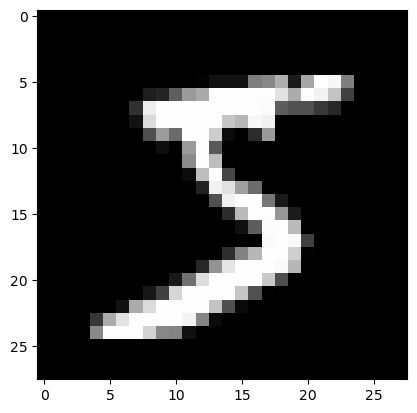

In [8]:
#2 Visualizing the Data
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='gray')

The Keras library expects the input to the convolutional neural network (CNN) to have four (4) dimensions, so you will add the fourth dimension as 1 using the reshape function.
The first three (3) dimensions represent the number of samples, as well as the width and length of each sample, respectively.
It is also better to normalize the input to be from 0 to 1, which is simple in this case. Grayscale images of MNIST contains pixels, and each pixel has a grayscale value from 0 to 255.
You can divide the input by 255 (maximum value for grayscale colours) to normalize it (i.e., make the values between 0 and 1).

In [9]:
#3 Prepare data for CNN
x_train = x_train.reshape(60000, 28, 28, 1)/255
# Reshape logic (# of samples, image width, image height, 1)
# We add the extra dimension because Keras requires four for CNN operations, hence the one
x_test = x_test.reshape(10000, 28, 28, 1)/255
# The normalization of images in CNNs is a crucial step to train it effectively
#The grayscale values are encoded to a float of [0, 1].
# ie. 255/255 --> 1 

#4 Set up CNN

In [10]:
from keras.models import Sequential
model = Sequential()#for adding layers together

#I) Add an "INPUT" Convolutional Layer
from keras.layers import Conv2D
model.add(Conv2D(filters= 28, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
#Syntax #of outpits, windowsize(x,y), use input shape from reshape

#II) Add a Pooling Layer
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2)))

##IIb) Add a flattening layer
from keras.layers import Flatten
model.add(Flatten())

#III) Add a Fully Connected Layer
from keras.layers import Dense
model.add(Dense(units=128, activation='relu'))
#note how a fully connected layer is the same as a traditional ANN layer

#IV) Add an "OUTPUT" Fully Connected Layer
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [11]:
#5 Configuring model for training
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

##actually running the model, for the training
#model.fit(...)
## running the model to generate predictions for input samples... PERFORMS THE TRAINING
#model.predict() ----> use after training
##Running the model to get loss and whatever metrics were specificied in the compile command
# model.evaluate(input to be predicted, target value)

In [12]:
model.fit(x_train, y_train, epochs=100)#CNNs should no have batfches

Epoch 1/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1588 - accuracy: 0.9531
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0546 - accuracy: 0.9835
Epoch 3/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0367 - accuracy: 0.9885
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 5/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0163 - accuracy: 0.9949
Epoch 6/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0114 - accuracy: 0.9960
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0085 - accuracy: 0.9970
Epoch 8/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 9/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0049 - accuracy: 0.9984
Epoch 10/100
1875/1875 [==============================] - 16s 9m

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1447 - accuracy: 0.9888
loss:  0.1447279453277588
accuracy:  0.9887999892234802
